In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
!pip install scikit-learn

In [3]:
data = pd.read_csv('heart_cleveland_upload.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


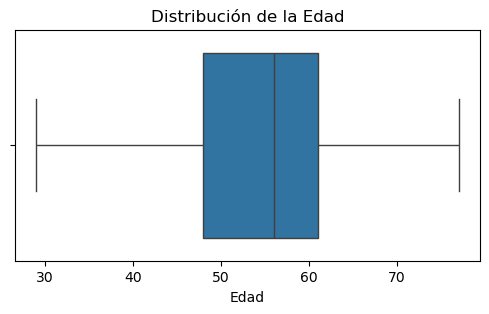

In [6]:
import matplotlib.pyplot as plt
data = pd.read_csv('heart_cleveland_upload.csv')
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age'])  
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.show()


In [7]:
data.info()
data.describe()
data.isnull().sum() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('thal', axis=1))


In [9]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [10]:
data.isnull().mean() * 100

age          0.0
sex          0.0
cp           0.0
trestbps     0.0
chol         0.0
fbs          0.0
restecg      0.0
thalach      0.0
exang        0.0
oldpeak      0.0
slope        0.0
ca           0.0
thal         0.0
condition    0.0
dtype: float64

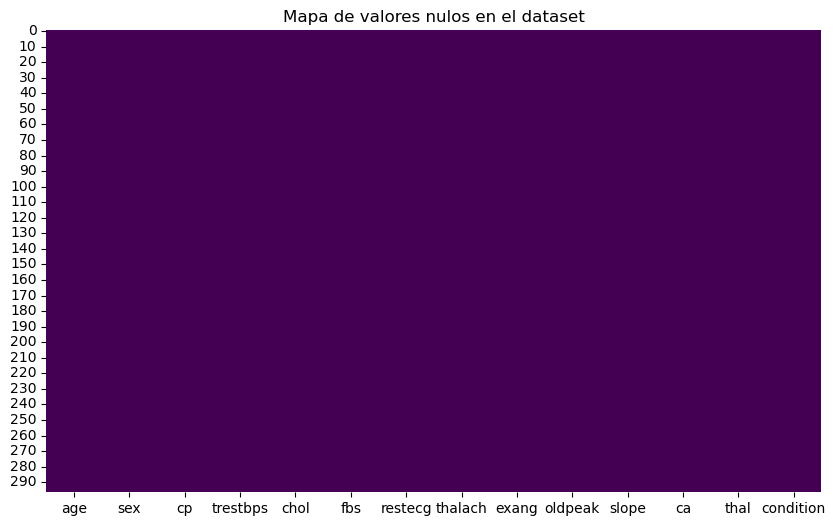

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos en el dataset")
plt.show()

In [12]:
# Contar ceros en cada columna
data_eq_zero = (data == 0).sum()
print("Número de ceros en cada columna:")
print(data_eq_zero)

Número de ceros en cada columna:
age            0
sex           96
cp            23
trestbps       0
chol           0
fbs          254
restecg      147
thalach        0
exang        200
oldpeak       96
slope        139
ca           174
thal         164
condition    160
dtype: int64


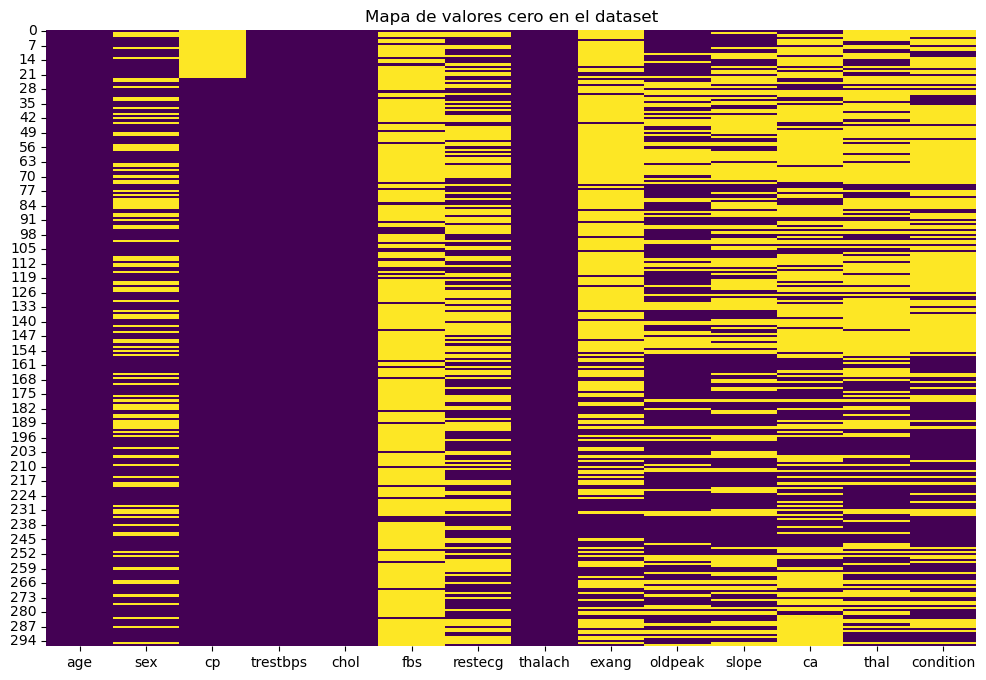

In [13]:

plt.figure(figsize=(12, 8))
sns.heatmap(data == 0, cbar=False, cmap="viridis")
plt.title("Mapa de valores cero en el dataset")
plt.show()


In [14]:
for column in data.columns:
    data[column] = data[column].replace(0, data[column].mean())

In [15]:
data['chol'] = data['chol'].replace(0, data['chol'].mean())

In [16]:

columns_to_replace = ['trestbps', 'chol', 'thalach']

for column in columns_to_replace:
    data[column] = data[column].replace(0, data[column].median())


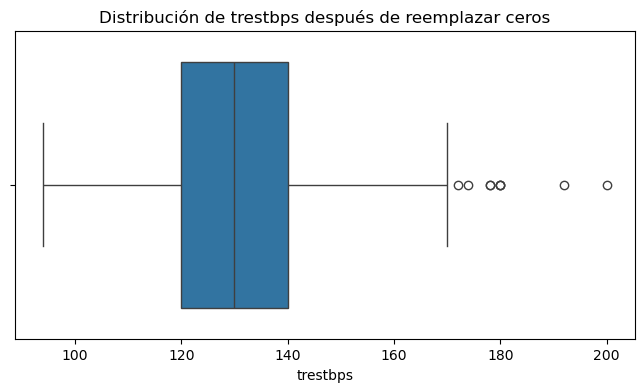

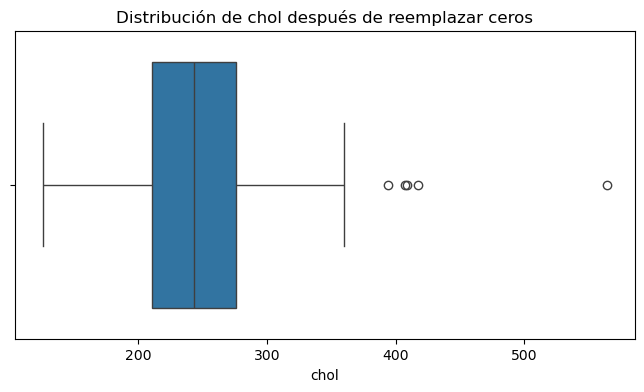

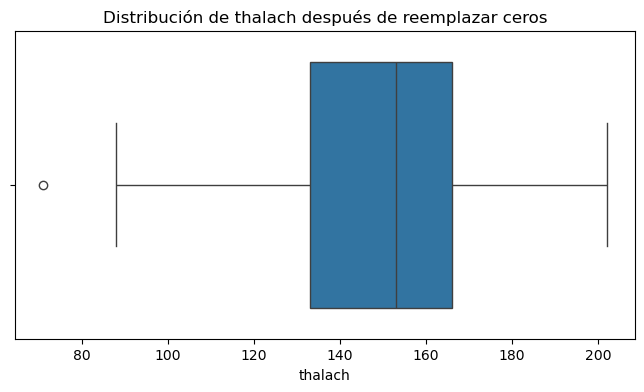

In [17]:
# boxplot para cada columna modificada
for column in columns_to_replace:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Distribución de {column} después de reemplazar ceros')
    plt.xlabel(column)
    plt.show()


In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = data.drop('condition', axis=1)  # Reemplaza 'condition' con el nombre de tu variable objetivo si es distinto
y = data['condition']

# Escalar los datos para mejorar la selección
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SelectKBest para obtener las mejores características
selector = SelectKBest(score_func=f_classif, k=5)  # Selecciona las 5 mejores características
X_selected = selector.fit_transform(X_scaled, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas con SelectKBest:", selected_features)


Características seleccionadas con SelectKBest: Index(['cp', 'thalach', 'exang', 'ca', 'thal'], dtype='object')


In [19]:
print(X_train)

NameError: name 'X_train' is not defined

In [ ]:
print(X_test)

In [ ]:
# Imprimir algunas muestras de y_train
print(y_train[:10])

# Verificar si y_train contiene valores continuos
print("Tipos de datos en y_train:", set(y_train))


In [ ]:
import pandas as pd

# Ejemplo de conversión de valores continuos a categorías (binarización simple)
bins = [min(y_train), 0.5, max(y_train)]  # Ajusta los límites de los bins según tus datos
labels = [0, 1]  # Ajusta las etiquetas según tus datos
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)

# Verifica la conversión
print(y_train_binned[:10])
print("Tipos de datos en y_train_binned:", set(y_train_binned))



In [ ]:
import pandas as pd
import numpy as np

# Asegurarse de que y_train sea una serie de pandas
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

# Verificar si hay valores NaN en y_train
print("Cantidad de NaN en y_train:", y_train.isna().sum())

# Si hay valores NaN, eliminarlos o imputarlos
if y_train.isna().sum() > 0:
    # Eliminar valores NaN de y_train y los correspondientes de X_train
    mask = ~y_train.isna()
    X_train = X_train[mask]
    y_train = y_train[mask]


In [ ]:
data.head(33)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.DataFrame({
    'age': [69, 67, 66, 65, 64, 64, 63, 61, 60, 59, 59, 59, 58, 56, 57, 57, 55, 54, 54, 54, 54, 53, 52, 52, 51, 51, 50, 50, 49, 45, 45, 44, 41],
    'sex': [1, 0.676768, 0.676768, 1, 1, 1, 1, 1, 0.676768, 1, 1, 1, 0.676768, 1, 1, 1, 1, 1, 1, 1, 1, 0.676768, 1, 1, 1, 1, 1, 0.676768, 1, 1, 1, 0.676768, 1],
    'cp': [2.158249] * 33,
    'trestbps': [160, 140, 150, 138, 110, 170, 145, 134, 130, 170, 170, 120, 150, 120, 118, 138, 140, 122, 120, 108, 140, 130, 172, 136, 125, 125, 140, 110, 126, 140, 142, 120, 140],
    'chol': [234, 239, 226, 282, 211, 227, 233, 234, 258, 288, 240, 288, 283, 193, 186, 266, 226, 230, 224, 254, 192, 204, 199, 168, 229, 245, 231, 197, 176, 197, 236, 226, 312],
    'fbs': [1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2],
    'restecg': [2.0, 0.996633, 0.996633, 2.0, 2.0, 2.0, 2.0, 0.996633, 2.0, 2.0, 2.0, 2.0, 0.996633, 2.0, 2.0, 2.0, 2.0, 0.996633, 2.0, 2.0, 2.0, 2.0, 0.996633, 2.0, 2.0, 2.0, 2.0, 0.996633, 2.0, 2.0, 2.0, 0.996633, 2.0],
    'thalach': [131, 151, 144, 174, 144, 155, 150, 134, 171, 159, 125, 119, 162, 162, 163, 162, 163, 169, 178, 154, 192, 162, 150, 166, 125, 154, 178, 156, 142, 146, 142, 154, 178],
    'exang': [0.326599, 1.0, 1.0, 0.326599, 1.0, 0.326599, 1.0, 0.326599, 1.0, 0.326599, 0.326599, 0.326599, 1.0, 1.0, 0.326599, 0.326599, 1.0, 0.326599, 1.0, 0.326599, 1.0, 0.326599, 1.0, 0.326599, 0.326599, 0.326599, 1.0, 1.0, 1.0, 0.326599, 0.326599, 0.326599, 0.326599],
    'oldpeak': [0.1, 1.8, 2.6, 1.4, 1.8, 0.6, 2.3, 0.1, 0.9, 0.2, 0.1, 0.1, 1.0, 1.9, 1.05, 0.1, 1.0, 0.1, 1.4, 0.1, 1.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.05, 0.1, 1.4],
    'slope': [1.0, 0.602694, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.602694, 1.0, 1.0, 2.0, 0.602694, 2.0, 0.602694, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.602694, 1.0, 0.602694, 1.0, 2.0, 1.0, 0.602694, 2.0, 1.0, 2.0],
    'ca': [1.0, 1.0, 0.676768, 1.0, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768, 0.676768],
    'thal': [0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 2.0, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017, 0.835017],
    'condition': [0.461279, 0.461279, 0.461279, 1.0, 1.0, 0.461279, 0.461279, 0.461279, 0.461279, 0.461279, 0.461279, 1.0, 0.461279, 0.461279, 0.461279, 1.0, 0.461279, 0.461279, 1.0, 0.461279, 1.0, 0.461279, 1.0, 0.461279, 1.0, 0.461279, 1.0, 0.461279, 1.0, 0.461279, 0.461279, 1.0, 1.0]
})

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data['age'], data['chol'], 'o-', label='Colesterol')
plt.xlabel('Edad')
plt.ylabel('Nivel de Colesterol')
plt.title('Relación entre Edad y Niveles de Colesterol')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame llamado 'data'
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')  # Cambié 'EDAD' a 'viridis' porque 'EDAD' no es un cmap estándar
plt.title("Mapa de color")
plt.show()
